In [1]:
import numpy as np 
import pandas as pd 

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
sns.set_style("whitegrid")

import warnings
warnings.filterwarnings("ignore")



In [2]:
training=pd.read_csv("train.csv")
testing=pd.read_csv("test.csv")
training.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
def null_table(training, testing):
    print("Training Data Frame")
    print(pd.isnull(training).sum()) 
    print(" ")
    print("Testing Data Frame")
    print(pd.isnull(testing).sum())

null_table(training, testing)

Training Data Frame
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
 
Testing Data Frame
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [4]:
training.drop(labels = ["Fare", "Ticket","Cabin"], axis = 1, inplace = True)
testing.drop(labels = ["Fare", "Ticket","Cabin"], axis = 1, inplace = True)

null_table(training, testing)

Training Data Frame
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Embarked         2
dtype: int64
 
Testing Data Frame
PassengerId     0
Pclass          0
Name            0
Sex             0
Age            86
SibSp           0
Parch           0
Embarked        0
dtype: int64


In [5]:
#the mode will be an acceptable value to place in the NaN cells
training["Age"].fillna(training["Age"].median(), inplace = True)
testing["Age"].fillna(testing["Age"].median(), inplace = True) 

null_table(training, testing)

Training Data Frame
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Embarked       2
dtype: int64
 
Testing Data Frame
PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Embarked       0
dtype: int64


In [6]:
training.loc[training["Sex"] == "male", "Sex"] = 0
training.loc[training["Sex"] == "female", "Sex"] = 1

training.loc[training["Embarked"] == "S", "Embarked"] = 0
training.loc[training["Embarked"] == "C", "Embarked"] = 1
training.loc[training["Embarked"] == "Q", "Embarked"] = 2

testing.loc[testing["Sex"] == "male", "Sex"] = 0
testing.loc[testing["Sex"] == "female", "Sex"] = 1

testing.loc[testing["Embarked"] == "S", "Embarked"] = 0
testing.loc[testing["Embarked"] == "C", "Embarked"] = 1
testing.loc[testing["Embarked"] == "Q", "Embarked"] = 2


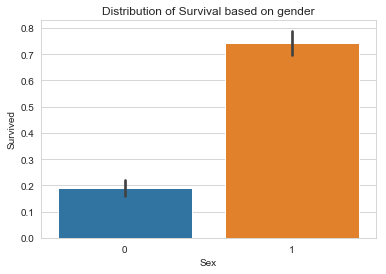

In [7]:
sns.barplot(x="Sex", y="Survived", data=training)
plt.title("Distribution of Survival based on gender")
plt.show()

In [9]:
training["FamSize"] = training["SibSp"] + training["Parch"] + 1
testing["FamSize"] = testing["SibSp"] + testing["Parch"] + 1


In [10]:
training['Age'] = np.where(( ( (training['Age']>16) & (training['Age']<30 ) )),1,0)

In [11]:
training.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Embarked,FamSize
0,1,0,3,"Braund, Mr. Owen Harris",0,1,1,0,0,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,0,1,0,1,2
2,3,1,3,"Heikkinen, Miss. Laina",1,1,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,0,1,0,0,2
4,5,0,3,"Allen, Mr. William Henry",0,0,0,0,0,1


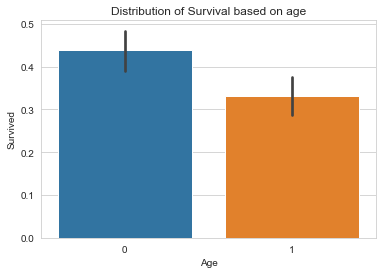

In [12]:
sns.barplot(x="Age", y="Survived", data=training)
plt.title("Distribution of Survival based on age")
plt.show()

In [13]:
from sklearn.svm import SVC
training.drop(labels = ["Name","SibSp", "Parch"], axis = 1, inplace = True)
testing.drop(labels = ["Name","SibSp", "Parch"], axis = 1, inplace = True)


In [14]:
from sklearn.metrics import make_scorer, accuracy_score 
from sklearn.model_selection import GridSearchCV
training["Embarked"].fillna(training["Embarked"].median(), inplace = True)

In [15]:
null_table(training, testing)

Training Data Frame
PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
Embarked       0
FamSize        0
dtype: int64
 
Testing Data Frame
PassengerId    0
Pclass         0
Sex            0
Age            0
Embarked       0
FamSize        0
dtype: int64


In [16]:

features = ["Pclass", "Sex", "Age", "Embarked", "FamSize"]
X_train = training[features] #define training features set
y_train = training["Survived"] #define training label set
X_test = testing[features]
from sklearn.model_selection import train_test_split #to create validation data set

X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=0) #X_valid and y_valid are the validation sets
svc_clf = SVC() 
svc_clf.fit(X_train, y_train)
pred_svc = svc_clf.predict(X_test)
acc_svc = accuracy_score(y_test, pred_svc)

print(acc_svc)

0.8100558659217877
